# ★ Solving Equations ★

# 1.1 The Bisection Method

## DEFINITION 1.1

The function $f(x)$ has a root at $x = r$ if $f(r) = 0$

## THEOREM 1.2

Let $f$ be a continuous function on $[a, b]$, satisfying $f(a)f(b) < 0$. Then $f$ has a root between $a$ and $b$, that is, that exists a number $r$ satisfying $a < r < b$ and $f(r) = 0$.

In [1]:
# Import modules
import traceback
import math
import pandas as pd
import numpy as np
import scipy
import scipy.linalg as LA
import matplotlib.pyplot as plt

from scipy import optimize

In [2]:
def bisect(f, a, b, tol):
    """
    Computes approximate solution of f(x)=0
    
    Arguments:
        f (function prototype) : function handle 
        a (real number) : left bound of the interval
        b (real number) : right bound of the interval
        tol (real number) : tolerance
        
    Returns:
        Approximate solution x
        
    Raises:
        ValueError:
            - a * b must be smaller than zero
            - a > b will be considered to be wrong
    """
    try:
        if a > b :
            raise ValueError('a must be <= b')
        
        fa = f(a)
        fb = f(b)
        
        if np.sign(fa) * np.sign(fb) >= 0 :
            raise ValueError('It must be verified that f(a) * f(b) < 0')
            
        while (b - a) / 2 > tol :
            # Find the intermediate point  
            c = (a + b) / 2
            fc = f(c)
            if fc == 0 :
                return c
            elif fa * fc < 0 :
                b = c
                fb = fc
            else :
                a = c
                fa = fc
                
        return (a + b) / 2
            
    except ValueError as e :
        print('ValueError Exception : ', e)
        traceback.print_exception()
    

### Example 

Find a root of $f(x) = x^3 + x - 1$ by using the Bisection Method on the interval $[0, 1]$.

In [3]:
root = scipy.optimize.bisect(lambda x : math.pow(x, 3) + x - 1, 0, 1)
print('{:>.8f}'.format(root))

0.68232780


## Definition 1.3
A solution is correct within  $p$ decimal places if the error is less than $0.5 \times 10^{-p}$.

### Example

Use the Bisection Method to find a root of $f(x) = cosx - x$ in the interval $[0, 1]$ to within six correct places.

In [4]:
root = scipy.optimize.bisect(lambda x : math.cos(x) - x, 0, 1)
print('{:>.6f}'.format(root))

0.739085


## 1.1 Computer Problems

1. Use the Bisection Method to ﬁnd the root to six correct decimal places.

(a) $x^3 = 9$

In [5]:
root = scipy.optimize.bisect(lambda x : np.power(x, 3) - 9, 2, 3)
print('{:>.6f}'.format(root))

2.080084


(b) $3x^3 + x^2 = x + 5$

In [6]:
root = scipy.optimize.bisect(lambda x : 3 * np.power(x, 3) + np.power(x, 2) - x - 5, 1, 2)
print('{:>.6f}'.format(root))

1.169726


(c) $\cos^2{x} + 6 = x$

In [7]:
root = scipy.optimize.bisect(lambda x : np.power(np.cos(x), 2) - x + 6, 0, 10)
print('{:>.6f}'.format(root))

6.776092


---
2. Use the Bisection Method to ﬁnd the root to eight correct decimal places.

(a) $x^5 + x = 1$

In [8]:
root = scipy.optimize.bisect(lambda x : np.power(x, 5) + x - 1, 0, 1)
print('{:>.8f}'.format(root))

0.75487767


(b) $sin{x} = 6x + 5$

In [9]:
root = scipy.optimize.bisect(lambda x : np.sin(x) - 6 * x - 5, -5, 5)
print('{:>.8f}'.format(root))

-0.97089892


(c) $ln{x} + x^2 = 3$

In [10]:
root = scipy.optimize.bisect(lambda x : np.log(x) + np.power(x, 2) - 3, 1, 2)
print('{:>.8f}'.format(root))

1.59214294


---
3. Use the Bisection Method to locate all solutions of the following equations. Sketch the function by using MATLAB’s plot command and identify three intervals of length one that contain a root. Then find the roots to six correct decimal places.

(a) $2x^3 - 6x - 1 = 0$

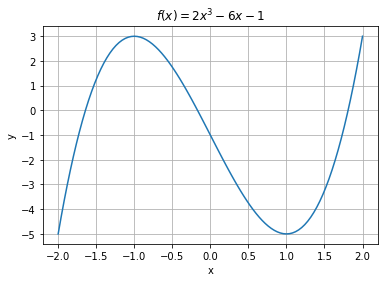

In [57]:
f = lambda x : 2 * np.power(x, 3) - 6 * x - 1
xpts = np.linspace(-2, 2, 101)
ypts = f(xpts)

plt.plot(xpts, ypts)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x) = 2x^3 - 6x - 1$')
plt.grid(True)
plt.show()

(b) $e^{x-2} + x^3 - x = 0$

(c) $1 + 5x - 6x^3 - e^{2x} = 0$

In [11]:
def generate_points(f,xs):
    ys = np.zeros(xs.size)
    for i in range(len(xs)):
        ys[i] = f(xs[i])
    return ys

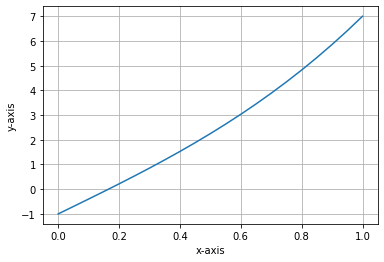

x = 0.165165


In [12]:
fa = lambda x : 2 * math.pow(x,3) + 6 * x - 1
xs = np.linspace(0,1,21)
ys = generate_points(fa,xs)
plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

fa_xc = bisect(fa,0,1,1e-7)
print('x =',round(fa_xc,6))

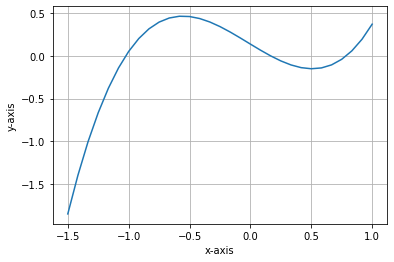

x = -1.023482
x = 0.163822
x = 0.788941


In [13]:
fb = lambda x : math.exp(x - 2) + math.pow(x,3) - x
xs = np.linspace(-1.5,1,31)
ys = generate_points(fb,xs)

plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

fb_xc = bisect(fb,-1.5,-0.5,1e-7)
print('x =',round(fb_xc,6))
fb_xc = bisect(fb,-0.5,0.5,1e-7)
print('x =',round(fb_xc,6))
fb_xc = bisect(fb,0.5,1.5,1e-7)
print('x =',round(fb_xc,6))

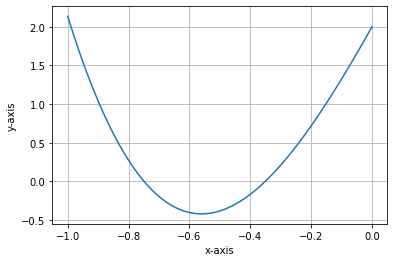

x = -0.351014
x = -0.749061


In [14]:
fc = lambda x : 1 + 5 * x - 6 * math.pow(x,3) + math.exp(2 * x) 
xs = np.linspace(-1,0,51)
ys = generate_points(fc,xs)

plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

fc_xc = bisect(fc,-0.5,0.5,1e-7)
print('x =',round(fc_xc,6))
fc_xc = bisect(fc,-1.5,-0.5,1e-7)
print('x =',round(fc_xc,6))

---
The **Hilbert Matrix**  is the n × n matrix whose ijth entry is $\frac{1}{i + j - 1}$. Let $A$ denote the
5 × 5 Hilbert matrix. Its largest eigenvalue is about 1.567. Use the Bisection Method to decide
how to change the upper left entry $A_{11}$ to make the largest eigenvalue of $A$ equal to $\pi$.

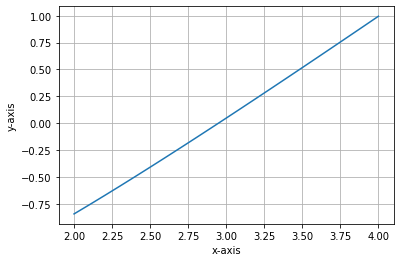

Make A[1,1] to be 2.948011 to make the largest eigenvalue equal to pi


In [15]:
def rev_hilbert_matrix_eigvals(upper_left_element):
    hilbert_matrix = LA.hilbert(5)
    hilbert_matrix[0][0] = upper_left_element
    return LA.eigvals(hilbert_matrix)

f = lambda x : np.max(rev_hilbert_matrix_eigvals(x)).real - scipy.pi
xs = np.linspace(2,4,21)
ys = generate_points(f,xs)

plt.plot(xs,ys)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

xc = bisect(f,2.5,3.5,1e-7)
print('Make A[1,1] to be',round(xc,6),'to make the largest eigenvalue equal to pi')

# 1.2 Fixed-Point Iteration

In [16]:
def fpi(g, x0, k, tol = 0):
    """
    Computes approximate solution of g(x)=x by Fixed-Point Iteration
    
    Args:
        g (function prototype) : function handle
        x0 (real number) : starting guess 
        k (integer) : number of iteration steps
        tol (real number) : tolerance (default : 0)
        
    Returns:
        Approximate solution xc
    
    Raises:
        ValueError :
            - g is None
            - k is not the type of positive integer 
            - tol is negative
    """
    try:
        if g is None :
            raise ValueError('f is null')
        if k != int(k) :
            raise ValueError('k must be type of integer')
        if k < 0 :
            raise ValueError('k must be positive integer')
        if tol < 0 :
            raise ValueError('tol must be positive')
            
        x = x0
        for _ in range(k) :
            tx = g(x)
            if tol > 0 and abs(tx - x) / abs(tx) < tol :
                return tx
            else :
                x = tx
        
        return x
    except ValueError as e:
        print('ValueError Exception : ', e)
        traceback.print_exception()

### Theorem
Assume that $g$ is continuously differentiable, that $g(r) = r$, and that $S = \left | {g}'(r) \right | < 1$. Then Fixed-Point Iteration converges linearly with rate $S$ to the fixed point $r$ for initial guesses sufficiently close to $r$.

### Example
Use Fixed-Point Iteration to find a root of $cosx = sinx$

In [17]:
"""
cosx = sinx
=> x + cosx - sinx = x
=> g(x) = x + cosx - sinx
"""
g = lambda x : x + math.cos(x) - math.sin(x)
x = np.arange(21)
df = pd.DataFrame()

df['g(x)']= [fpi(g, 0, x[i]) for i in range(21)]

print(df)

        g(x)
0   0.000000
1   1.000000
2   0.698831
3   0.821102
4   0.770620
5   0.791519
6   0.782863
7   0.786448
8   0.784963
9   0.785578
10  0.785324
11  0.785429
12  0.785385
13  0.785403
14  0.785396
15  0.785399
16  0.785398
17  0.785398
18  0.785398
19  0.785398
20  0.785398


### Example
Find the fixed points of $g(x)=2.8x - x^2$

In [18]:
g = lambda x : 2.8 * x - math.pow(x,2)
print(fpi(g, 0.1, 300))

1.8000000000000003


## 1.2 Computer Problems

Apply Fixed-Point Iteration to find the solution of each equation to eight correct decimal places.
- (a) $ x^3 = 2x + 2 $
- (b) $ e^x + x = 7 $
- (c) $ e^x + \sin x = 4$

In [19]:
"""
(a) x^3 = 2x + 2
==> x = (2x + 2)^(1/3)
==> g(x) = (2x + 2)^(1/3)
"""
a = lambda x : math.pow(2 * x + 2, 1 / 3)
print(fpi(a,0,100,1e-8))

1.7692923532114473


In [20]:
"""
(b) e^x + x = 7
==> e^x = 7 - x
==> ln(7 - x) = x
==> g(x) = ln(7 - x)
"""
b = lambda x : math.log(7 - x)
print(fpi(b,0,200,1e-8))

1.6728216991633662


In [21]:
"""
(c) e^x + sinx = 4
==> e^x = 4 - sinx
==> x = ln(4 - sinx)
"""
c = lambda x : math.log(4 - math.sin(x))
print(fpi(c,0,100,1e-8))

1.1299804991229483


# 1.3 Limits of Accuracy

### Definition
Assume that $f$ is a function and  that $r$ is a root, meaning that it satisfies $f(r)=0$. Assume that $x_a$ is an approximation to $r$. For the root-finding problem, the ** backward error ** of the approximation $x_a$ is $\left | f(x_a) \right |$ and  the ** forward error **  is $\left | r - x_a \right |$

### Definition
Assume that $r$ is a root of the differentiable function $f$ ; that is, assume that $f(r) = 0$. Then if $0 = f(r) = f'(r) = f''(r) = ... = f^{(m-1)}(r)$, but $f^{(m)}(r) \neq 0$, we say that $f$ has a **root** of **multiplicity** $m$ at $r$. We say that $f$ has a **multiple root** at $r$ if the multiplicity is greater than one. The root is called **simple** if the multiplicity is one.

### Example
The function $f(x) = sinx - x$ has  a triple root at $r = 0$. Find the forward and backward error of the approximate root $x_a = 0.001$.

$f(0) = \sin0 - 0 = 0$<br/>
$f'(0) = \cos0 - 1 = 0$<br/>
$f''(0) = -\sin0 - 0 = 0$<br/>
$f'''(0) = -\cos0 - 0 = -1$<br/>

The forward error is $\left | r - x_a \right | = 10^{-3}$<br/>
The backward error is $\left | f(x_a) \right | = \left | sin(0.001) - 0.001 \right | \approx 1.6667 \times 10^{-10}$

   ### Sensitivity Formula for Roots
   Assume that $r$ is a root of $f(x)$ and $r + \Delta r$ is a root of $f(x) + \epsilon g(x)$. Then 
   $$ \Delta r \approx -\frac{\epsilon g(r)}{f'(r)}$$
   if $\epsilon \ll  f'(r)$

## 1.3 Computer Problems

Let $f(x) = sinx - x$.
- (a) Find the multiplicity of the root r = 0.
- (b) Use initial guess x = 0.1 to locate a root. What are the forward and backward errors

$f'(0) = \cos0 - 1 = 0$<br/>
$f''(0) = -\sin0 = 0$<br/>
$f'''(0) = -\cos0 = -1$<br/>

multiplicity = 3

In [22]:
from scipy.optimize import fsolve
f = lambda x : math.sin(x) - x
r = fsolve(f,0.1)[0]
print('forward error = %.16f' %(abs(r)))
print('backward error = %.16f' %(abs(f(r))))

forward error = 0.0000000213751396
backward error = 0.0000000000000000


---
(a) Use fzero to find the root of $f(x) = 2x\cos{x} - 2x + \sin{x^3}$ on $\left [ -0.1, 0.2 \right ]$. Report the forward and backward errors.

(b) Run the Bisection Method with initial interval $\left [ -0.1, 0.2 \right ]$ to find as many correct digits as possible

In [23]:
from scipy.optimize import fsolve
f = lambda x : 2 * x * math.cos(x) - 2 * x + math.sin(math.pow(x, 3))
r = fsolve(f,0.04)[0]
print('x = %.16f' % r)
print('forward  error : %e' % abs(r) )
print('backward error : %e' % abs(f(r)) )

x = 0.0001217354799952
forward  error : 1.217355e-04
backward error : 2.019484e-28


In [24]:
"""
f(x) 
=> 2x * (cos(x) - 1) + sin(x^3)
=> (2x * (cos^2(x) - 1) + (cos(x) + 1) * sin(x^3)) / (cos(x) + 1)
=> (2x * -sin^2(x)  + (cos(x) + 1) * sin(x^3)) / (cos(x) + 1)
"""
f = lambda x : (2 * x * -math.pow(math.sin(x), 2) + (math.cos(x) + 1) * math.sin(math.pow(x, 3))) / (math.cos(x) + 1)
r = bisect(f,-0.1,0.2,1e-7)
print('x = %.16f' % r)
print('forward  error : %e' % abs(r) )
print('backward error : %e' % abs(f(r)) )

x = -0.0000000238418579
forward  error : 2.384186e-08
backward error : 2.938736e-39


# 1.4 Newton's Method

In [25]:
def newton_method( f, df, x0, k = 500, tol = 1e-6) :
    """
    Use Newton's method to find the root of the function
    
    Args:
        f (function prototype) : function handle
        df (function prototype) : derivative function handle
        x0 (real number) : starting guess 
        k (integer) : number of iteration steps (default : 500)
        tol (real number) : tolerance (default : 1e-6)
        
    Return:
        Approximate solution xc
        
    Raises:
        ValueError :
            - f or df is None
            - k is smaller than 0
    """
    try:
        if f is None or df is None :
            raise ValueError('Function handle f or df is Null')
        
        if k <= 0 :
            raise ValueError('Iteration k must be larger than 0')
        
        xc = x0
        for _ in range(k) :
            xt = xc - f(xc) / df(xc)
            if tol > 0 and abs(xt - xc) / abs(xc) < tol :
                return xt
            else :
                xc = xt
        return xc
    except ValueError as e :
        print('ValueError Exception : ', e)
        traceback.print_exception()   

### Example
Find the Newton's Method formula for the equation $x^3 + x - 1 = 0$.

In [26]:
f = lambda x : math.pow(x,3) + x - 1
df = lambda x : 3 * math.pow(x,2) + 1
xc = newton_method(f, df, -0.7, 25, 1e-8)
print ('x = %.8f' % xc)

x = 0.68232780


# 1.5 Root-Finding Without Derivatives

In [27]:
def secant_method(f, x0, x1, k=500) :
    """
    Use Secant's method to find the root of the formula
    
    Args:
        f (function prototype) : function handle
        x0 (real number) : initial guess
        x1 (real number) : initial guess 
        k (integer) : number of iteration steps (default : 500)
        
    Return:
        Approximate solution xc
        
    Raises:
    
    """
    x = np.zeros(k)
    x[0] = x0
    x[1] = x1
    for i in range(1,k - 1):
        if f(x[i]) - f(x[i - 1]) == 0 :
            return x[i]
        x[i + 1] = x[i] - f(x[i]) * (x[i] - x[i - 1])  / (f(x[i]) - f(x[i - 1]))
        
    return x[k - 1]

### Example 
Apply the Secant Method with starting guesses $x_0 = 0,x_1 = 1$ to find the root of $f(x)=x^3 + x + 1$

In [28]:
f = lambda x : math.pow(x, 3) + x - 1
secant_method(f, 0, 1, 100)

0.6823278038280193

In [29]:
def false_position_method(f, a, b, k) :
    """
    Use false position method to find the root of the formula f
    
    Args:
        f (function prototype) : function handle
        a (real number) : the lowerbound of the bracket of initial guess
        b (real number) : the upperbound of the bracket of initial guess
        k (integer) : number of iteration steps (default : 500)
        
    Return:
        Approximate solution xc
        
    Raises:
        ValueError:
            - f(a) * f(b) must be smaller than 0 (exclude zero)
        
    """
    if f(a) * f(b) >= 0 :
        raise ValueError('f(a) * f(b) must be < 0')
    for _ in range(k) :
        c = (b * f(a) - a * f(b)) / (f(a) - f(b))
        if f(c) == 0 :
            return c
        if f(a) * f(c) < 0 :
            b = c
        else :
            a = c
    return c

### Example
Apply the Method of False Position on interval $[-1,1]$ to find the root $r = 0$ of $f(x) = x^3 - 2x^2 + \frac{3}{2}x$

In [30]:
f = lambda x : pow(x, 3) - 2 * pow(x, 2) + 1.5 * x
false_position_method(f, -1, 1, 100)

7.528350053591502e-18

In [31]:
def inverse_quadratic_interpolation(f, x0, x1, x2, k):
    a = x0
    b = x1
    c = x2
    for _ in range(k) :
        q = f(a) / f(b)
        r = f(c) / f(b)
        s = f(c) / f(a)
        
        denominator = (q - 1) * (r - 1) * (s - 1)
        if denominator == 0 :
            break
        
        tmp = c - (r * (r - q) * (c - b) + (1 - r) * s * (c - a)) / denominator
        a = b
        b = c
        c = tmp
        
        
    return c

In [32]:
f = lambda x : pow(x, 3) + x - 1
inverse_quadratic_interpolation(f, 0, 0.5, 1, 20)

0.6823278038280193